<a href="https://colab.research.google.com/github/Maverick-Ansh/Karpathy-_neural_networks/blob/main/Karpathy__Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#we are starting it off
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def f(x):
  return 3*x**2-4*x+5


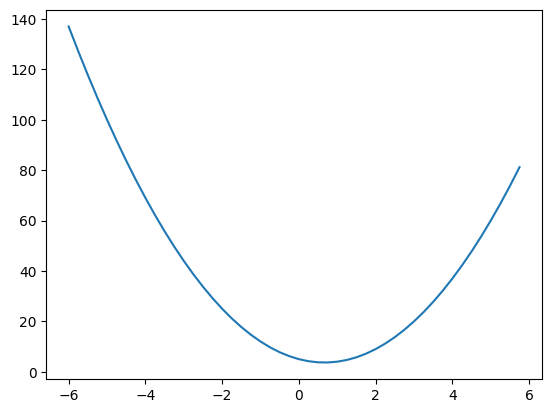

In [13]:
f(4.0)
xs=np.arange(-6,6,0.25)
ys=f(xs)
ys
plt.plot(xs,ys)

In [14]:
h=0.0000001
x=2/3
grad=(f(x+h)-f(x))/h
grad

2.9753977059954195e-07

In [15]:
#some basics for partial derivatives the smart way
h=0.0001
a=2.0
b=-3.0
c=10.0
d1=a*b+c
c+=h
d2=a*b+c
print('d1',d1)
print('d2',d2)
print('grad',(d2-d1)/h)
#alr that was some kinda thing and we saw some things ...and value increment and decrement

d1 4.0
d2 4.0001
grad 0.9999999999976694


In [32]:
class Value:
  def __init__(self,data,_children=(),_op='',label=''): #empty tuple if the user said nothing ..thats the thing
    self.data=data
    self._prev=set(_children)
    self._backward=lambda :None  #they say its empty function...need to understand it more
    self._op=_op
    self.label=label
    self.grad=0.0
  def __repr__(self):
    return f"Value(data={self.data})"  #just giving off the data parameter attatched to the object
  def __add__(self,other):
    out=Value(self.data+other.data,(self,other),'+')
    def _backward():
      self.grad=1.0*out.grad
      other.grad=1.0*out.grad

    out._backward=_backward #the variable gets the backward function and it know s the local ...
    return out
  def __mul__(self,other):
    out=Value(self.data*other.data,(self,other),'*')
    def _backward():
      self.grad=other.data*out.grad
      other.grad=self.data*out.grad
    return out
    out._backward=_backward
    #we can call the method actually by obj.tanh()..thats the way ...to do it
  def tanh(self):
    x=self.data
    n=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(n,(self,),'tanh')        #making a tuple one element only
    def _backward():
      self.grad=(1-t**2)*out.grad
    return out

a=Value(2.0, label='a')
b=Value(-3.0, label='b')
c=Value(10.0, label='c')
e=a*b;e.label='e'
#e.label we have to use ....for the label attribute
d=e+c;d.label='d'
f=Value(-2.0,label='f')
L=d*f;L.label='L'
#making it a layer deeper

In [17]:
d._op


'+'

In [18]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f }" % (n.label,n.data,n.grad ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

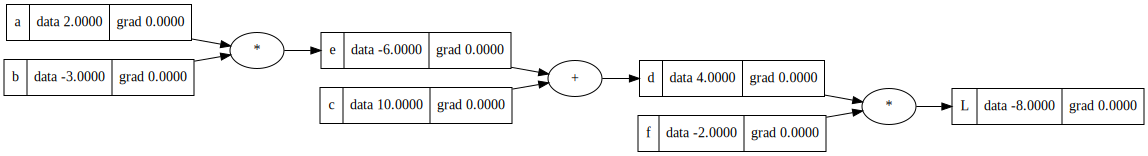

In [19]:
draw_dot(L)

In [20]:
L.grad=1.0
f.grad=d.data
d.grad=f.data
c.grad=d.grad*1
e.grad=d.grad*1
b.grad=e.grad*a.data
a.grad=e.grad*b.data
#object.attribute and u can fill up the value

In [21]:
def lol():
  h=0.001
  # g=Value(0.0001) # aiwi ,,,just for direct addition to the e because it wasn't working
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b;e.label='e'
  #e.label we have to use ....for the label attribute
  d=e+c;d.label='d'
  f=Value(-2.0,label='f')
  L=d*f;L.label='L'
  L1=L.data


  a=Value(2.0, label='a')
  b=Value(-3.0+h, label='b')
  c=Value(10.0, label='c')
  e=a*b;e.label='e'

  #e.label we have to use ....for the label attribute
  #method 2 .. d.data+=h..thats the thing
  d=e+c;d.label='d'

  f=Value(-2.0,label='f')
  L=d*f;L.label='L'
  L2=L.data

  grad=(L2-L1)/h
  return grad

lol()

-3.9999999999995595

In [22]:

a.data+=0.01*a.grad
b.data+=0.01*b.grad
c.data+=0.01*c.grad
d.data+=0.01*d.grad
e=a*b
d=e+c
L=d*f
print(L.data)

-7.4352


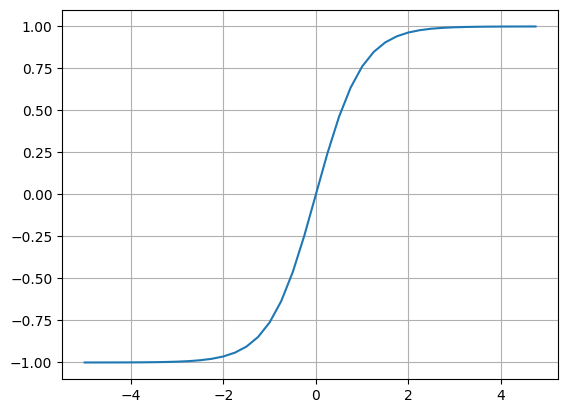

In [23]:
plt.plot(np.arange(-5,5,0.25),np.tanh(np.arange(-5,5,0.25)));plt.grid()

In [54]:
#inputs
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
b=Value(6.8813735870193432,label='b')
#weights
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')

x1w1=x1*w1;x1w1.label='x1w1'
x2w2=x2*w2;x2w2.label='x2w2'
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label='x1w1 + x2w2'
n=x1w1x2w2+b;n.label='n'
o=n.tanh();o.label='o'




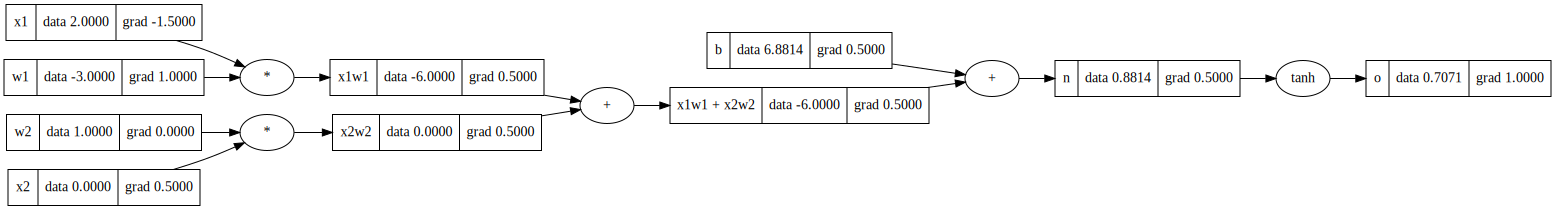

In [63]:
draw_dot(o)

In [61]:
o.grad=1.0
n.grad=1-(o.data**2)
x1w1x2w2.grad=n.grad
b.grad=n.grad
x1w1.grad=0.5
x2w2.grad=0.5
x2.grad=w2.data*x2w2.grad
x1.grad=w1.data*x1w1.grad
w2.grad=x2.data*x2w2.grad
w1.grad=x1.data*x1w1.grad
#o=tanh(n)
# do/dn is what we need..we need the derivative of tanh

In [43]:
o.data

0.9640275800758169